# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [66]:
#lam_M = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']
#lam_M2, lam_MM = [], []
#for i in range(0, 8):
#    for j in range(0, 8):
#        if i == j:
#            lam_M2.append(lam_M[i]+lam_M[j])
#        else:
#            continue
#for i in range(1, 8):
#    for j in range(0, i):
#        lam_MM.append(lam_M[i]+lam_M[j])
#lam = lam_M + lam_M2 + lam_MM
#lam

In [67]:
# Обозначим эмпирические данные молодых и взрослых особей
# И затащим их в один массив
# lam = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
lam_M = [0.0016, 0.00008, 0.0000007, 0.000016, 0.006, 0.004, 0.000000075, 0.00006]
lam_M2, lam_MM = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            lam_M2.append(lam_M[i]*lam_M[j])
        else:
            continue
for i in range(1, 8):
    for j in range(0, i):
        lam_MM.append(lam_M[i]*lam_M[j])
lam = lam_M + lam_M2 + lam_MM
# Сформируем вектор дополнительных данных 
sigma1, sigma2, D, D0 = 1, 1, 120, 70

# Количество генерируемых стратегий
Nmax = 40

### 2.2 Генерации стратегий

In [68]:
# Генерация параметров для стратегий
# Запись параметров в data_strat
import random as rn
import pandas as pd

def strategy(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.randint(-D*100, 0)
            A.append(a)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            b = rn.randint(-min(-a[i], a[i] + D*100), 0)
            A.append(a[i]/100)
            B.append(b/100)
            A.append(a[i]/100)
            B.append(-b/100)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat2 = {'Aa': A, 'Ba': B}
    data2 = pd.DataFrame(data = data_strat2)
    data = pd.concat([data1, data2], axis=1)
    data.to_csv("data_strat.csv", index=False)
    return data
    
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-35.70,-23.42,-45.49,-26.85
1,-35.70,23.42,-45.49,26.85
2,-85.46,-16.65,-82.80,-4.30
3,-85.46,16.65,-82.80,4.30
4,-117.15,-2.08,-7.70,-3.33
...,...,...,...,...
75,-84.12,7.23,-82.97,13.86
76,-78.17,-7.26,-39.69,-0.49
77,-78.17,7.26,-39.69,0.49
78,-91.21,-10.74,-105.86,-8.14


### 2.3 Подсчет макропараметров и создание выборки

In [69]:
# Подсчет макропараметров
# Запись их в data_macro
import pandas as pd
import numpy as np
from collections import defaultdict

def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M5'].append(sigma1*(Aa[i] + D))

      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))

      collect['M3'].append(-2*(np.pi)*(np.pi)*Bj[i]*Bj[i])
      collect['M7'].append(-2*(np.pi)*(np.pi)*Ba[i]*Ba[i])
      
      collect['M4'].append(-((Aj[i] + D0)*(Aj[i] + D0) + (Bj[i]*Bj[i])/2))
      collect['M8'].append(-((Aa[i] + D0)*(Aa[i] + D0) + (Ba[i]*Ba[i])/2))

   for i in range(1, 9):
      for j in range(1, 9):
         if i == j == 1 or i == j == 5:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         elif i == j:
            Z = -np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            continue
   
   for i in range(2, 9):
      for j in range(1, i):
         if i == 5 and j == 1:
            Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            Z = -np.abs(2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)]))
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
            
   data_macro = {}   
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)
data_macro

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,84.30,-72.590,-10826.884967,-1450.73820,74.51,-61.085,-14230.439758,-961.20135,7106.4900,-5269.308100,...,-4.128929e+07,-2.120620e+06,-1.738533e+06,-162058.547610,-139547.211993,-2.081363e+07,-2.788903e+06,-143238.225177,-117429.968929,-2.735664e+07
1,84.30,-96.010,-10826.884967,-1450.73820,74.51,-87.935,-14230.439758,-961.20135,7106.4900,-9217.920100,...,-4.128929e+07,-2.120620e+06,-2.502707e+06,-162058.547610,-184569.883227,-2.081363e+07,-2.788903e+06,-143238.225177,-169046.481424,-2.735664e+07
2,34.54,-26.215,-5472.152812,-377.62285,37.20,-35.050,-364.977971,-173.08500,1193.0116,-687.226225,...,-2.756480e+05,-2.715436e+04,-2.558496e+04,-11956.711800,-9074.846550,-1.894295e+06,-1.307217e+05,-12877.524000,-12133.258500,-1.263444e+05
3,34.54,-42.865,-5472.152812,-377.62285,37.20,-39.350,-364.977971,-173.08500,1193.0116,-1837.408225,...,-2.756480e+05,-2.715436e+04,-2.872377e+04,-11956.711800,-14838.577050,-1.894295e+06,-1.307217e+05,-12877.524000,-13621.789500,-1.263444e+05
4,2.85,-1.810,-85.399713,-2225.28570,112.30,-110.635,-218.886112,-3886.83445,8.1225,-3.276100,...,-9.741683e+05,-4.916182e+04,-4.843293e+04,-22154.956365,-14070.340709,-6.638691e+05,-1.729863e+07,-872983.017470,-860039.858751,-1.701548e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,35.88,-39.495,-1031.825688,-225.51085,37.03,-43.960,-3791.894115,-264.27070,1287.3744,-1559.855025,...,-1.710227e+06,-2.808277e+05,-3.333833e+05,-18964.065432,-20874.742593,-5.453626e+05,-1.191918e+05,-19571.888042,-23234.679944,-2.004173e+06
76,41.83,-38.200,-1040.406322,-93.10270,80.31,-80.065,-4.739384,-918.81615,1749.7489,-1459.240000,...,-8.824989e+02,-7.612399e+02,-7.589176e+02,-76868.159109,-70197.553860,-1.911884e+06,-1.710885e+05,-147580.250013,-147130.030099,-8.709245e+03
77,41.83,-45.460,-1040.406322,-93.10270,80.31,-80.555,-4.739384,-918.81615,1749.7489,-2066.611600,...,-8.824989e+02,-7.612399e+02,-7.635622e+02,-76868.159109,-83538.764358,-1.911884e+06,-1.710885e+05,-147580.250013,-148030.469927,-8.709245e+03
78,28.79,-23.420,-2276.870361,-507.53790,14.14,-10.070,-1307.912080,-1319.06940,828.8641,-548.496400,...,-1.327630e+06,-3.698775e+04,-2.634135e+04,-75952.016052,-61785.210696,-6.006700e+06,-1.338955e+06,-37303.282632,-26566.057716,-3.450454e+06


In [163]:
# Подсчет фитнесса
# Запись в data_fit_macro
import pandas as pd
from collections import defaultdict

def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]
      
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + (4*r*p + (p + q - s)**2)**0.5
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   #data = data.loc[data.J !=0]
   #data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [71]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,-0.183097,0.00,23.420,0.000000,0.00000,0.00,26.850,0.000000,0.00000,0.0000,...,0.000000e+00,7.641746e+05,0.000000,45022.671234,0.000000e+00,0.000000e+00,0.000000,51616.512495,0.000000e+00,-1.0
1,0.183097,0.00,-23.420,0.000000,0.00000,0.00,-26.850,0.000000,0.00000,0.0000,...,0.000000e+00,-7.641746e+05,0.000000,-45022.671234,0.000000e+00,0.000000e+00,0.000000,-51616.512495,0.000000e+00,1.0
2,0.308527,49.76,-46.375,-5354.732155,-1073.11535,37.31,-26.035,-13865.461787,-788.11635,5913.4784,...,-2.093466e+06,-1.712948e+06,-150101.835810,-130472.365443,-1.891934e+07,-2.658181e+06,-130360.701177,-105296.710429,-2.723029e+07,1.0
3,-0.308527,-49.76,46.375,5354.732155,1073.11535,-37.31,26.035,13865.461787,788.11635,-5913.4784,...,2.093466e+06,1.712948e+06,150101.835810,130472.365443,1.891934e+07,2.658181e+06,130360.701177,105296.710429,2.723029e+07,-1.0
4,0.278926,49.76,-29.725,-5354.732155,-1073.11535,37.31,-21.735,-13865.461787,-788.11635,5913.4784,...,-2.093466e+06,-1.709809e+06,-150101.835810,-124708.634943,-1.891934e+07,-2.658181e+06,-130360.701177,-103808.179429,-2.723029e+07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,-0.682643,-13.04,22.040,-1236.464039,-414.43520,-66.17,70.485,-1303.172696,-400.25325,-920.8848,...,-3.622651e+04,-2.557779e+04,916.143057,21753.553662,-4.094816e+06,-1.167867e+06,110276.967381,121464.412211,-3.441744e+06,-1.0
6316,0.619026,13.04,-11.300,1236.464039,414.43520,66.17,-62.345,1303.172696,400.25325,920.8848,...,3.622651e+04,4.687060e+04,-916.143057,6580.057050,4.094816e+06,1.167867e+06,-110276.967381,-99989.962379,3.441744e+06,1.0
6317,-0.619026,-13.04,11.300,-1236.464039,-414.43520,-66.17,62.345,-1303.172696,-400.25325,-920.8848,...,-3.622651e+04,-4.687060e+04,916.143057,-6580.057050,-4.094816e+06,-1.167867e+06,110276.967381,99989.962379,-3.441744e+06,-1.0
6318,-0.063618,0.00,10.740,0.000000,0.00000,0.00,8.140,0.000000,0.00000,0.0000,...,0.000000e+00,2.129281e+04,0.000000,28333.610712,0.000000e+00,0.000000e+00,0.000000,21474.449832,0.000000e+00,-1.0


In [72]:
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
import numpy as np
from collections import defaultdict

def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      tmp = max(np.abs(data_param['M' + str(i)]))
      max_M.append(tmp)
      Z = np.array(data_param['M' + str(i)])/tmp
      data['M' + str(i)] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
            max_M.append(tmp)
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
            data['M' + str(i) + 'M' + str(j)] = Z
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
         max_M.append(tmp)
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
         data['M' + str(i) + 'M' + str(j)] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.000000,0.198365,0.000000,0.000000,0.000000,0.233865,0.000000,0.000000,0.000000,0.274844,...,0.000000,0.097175,0.000000,0.050561,0.000000,0.000000,0.000000,0.049076,0.000000,-1.0
1,0.000000,-0.198365,0.000000,0.000000,0.000000,-0.233865,0.000000,0.000000,0.000000,-0.274844,...,0.000000,-0.097175,0.000000,-0.050561,0.000000,0.000000,0.000000,-0.049076,0.000000,1.0
2,0.425590,-0.392792,-0.100132,-0.221033,0.325908,-0.226766,-0.290186,-0.177820,0.412471,-0.318937,...,-0.358978,-0.217825,-0.181770,-0.146523,-0.130665,-0.082959,-0.124223,-0.100114,-0.222808,1.0
3,-0.425590,0.392792,0.100132,0.221033,-0.325908,0.226766,0.290186,0.177820,-0.412471,0.318937,...,0.358978,0.217825,0.181770,0.146523,0.130665,0.082959,0.124223,0.100114,0.222808,-1.0
4,0.425590,-0.251768,-0.100132,-0.221033,0.325908,-0.189313,-0.290186,-0.177820,0.412471,-0.238878,...,-0.358978,-0.217426,-0.181770,-0.140051,-0.130665,-0.082959,-0.124223,-0.098699,-0.222808,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,-0.111529,0.186677,-0.023122,-0.085363,-0.578005,0.613927,-0.027274,-0.090308,-0.064233,0.105669,...,-0.006212,-0.003253,0.001109,0.024430,-0.028281,-0.036448,0.105085,0.115486,-0.028162,-1.0
6316,0.111529,-0.095710,0.023122,0.085363,0.578005,-0.543028,0.027274,0.090308,0.064233,-0.062624,...,0.006212,0.005960,-0.001109,0.007390,0.028281,0.036448,-0.105085,-0.095068,0.028162,1.0
6317,-0.111529,0.095710,-0.023122,-0.085363,-0.578005,0.543028,-0.027274,-0.090308,-0.064233,0.062624,...,-0.006212,-0.005960,0.001109,-0.007390,-0.028281,-0.036448,0.105085,0.095068,-0.028162,-1.0
6318,0.000000,0.090967,0.000000,0.000000,0.000000,0.070900,0.000000,0.000000,0.000000,0.043045,...,0.000000,0.002708,0.000000,0.031819,0.000000,0.000000,0.000000,0.020417,0.000000,-1.0


### 2.4 Проверка корреляции

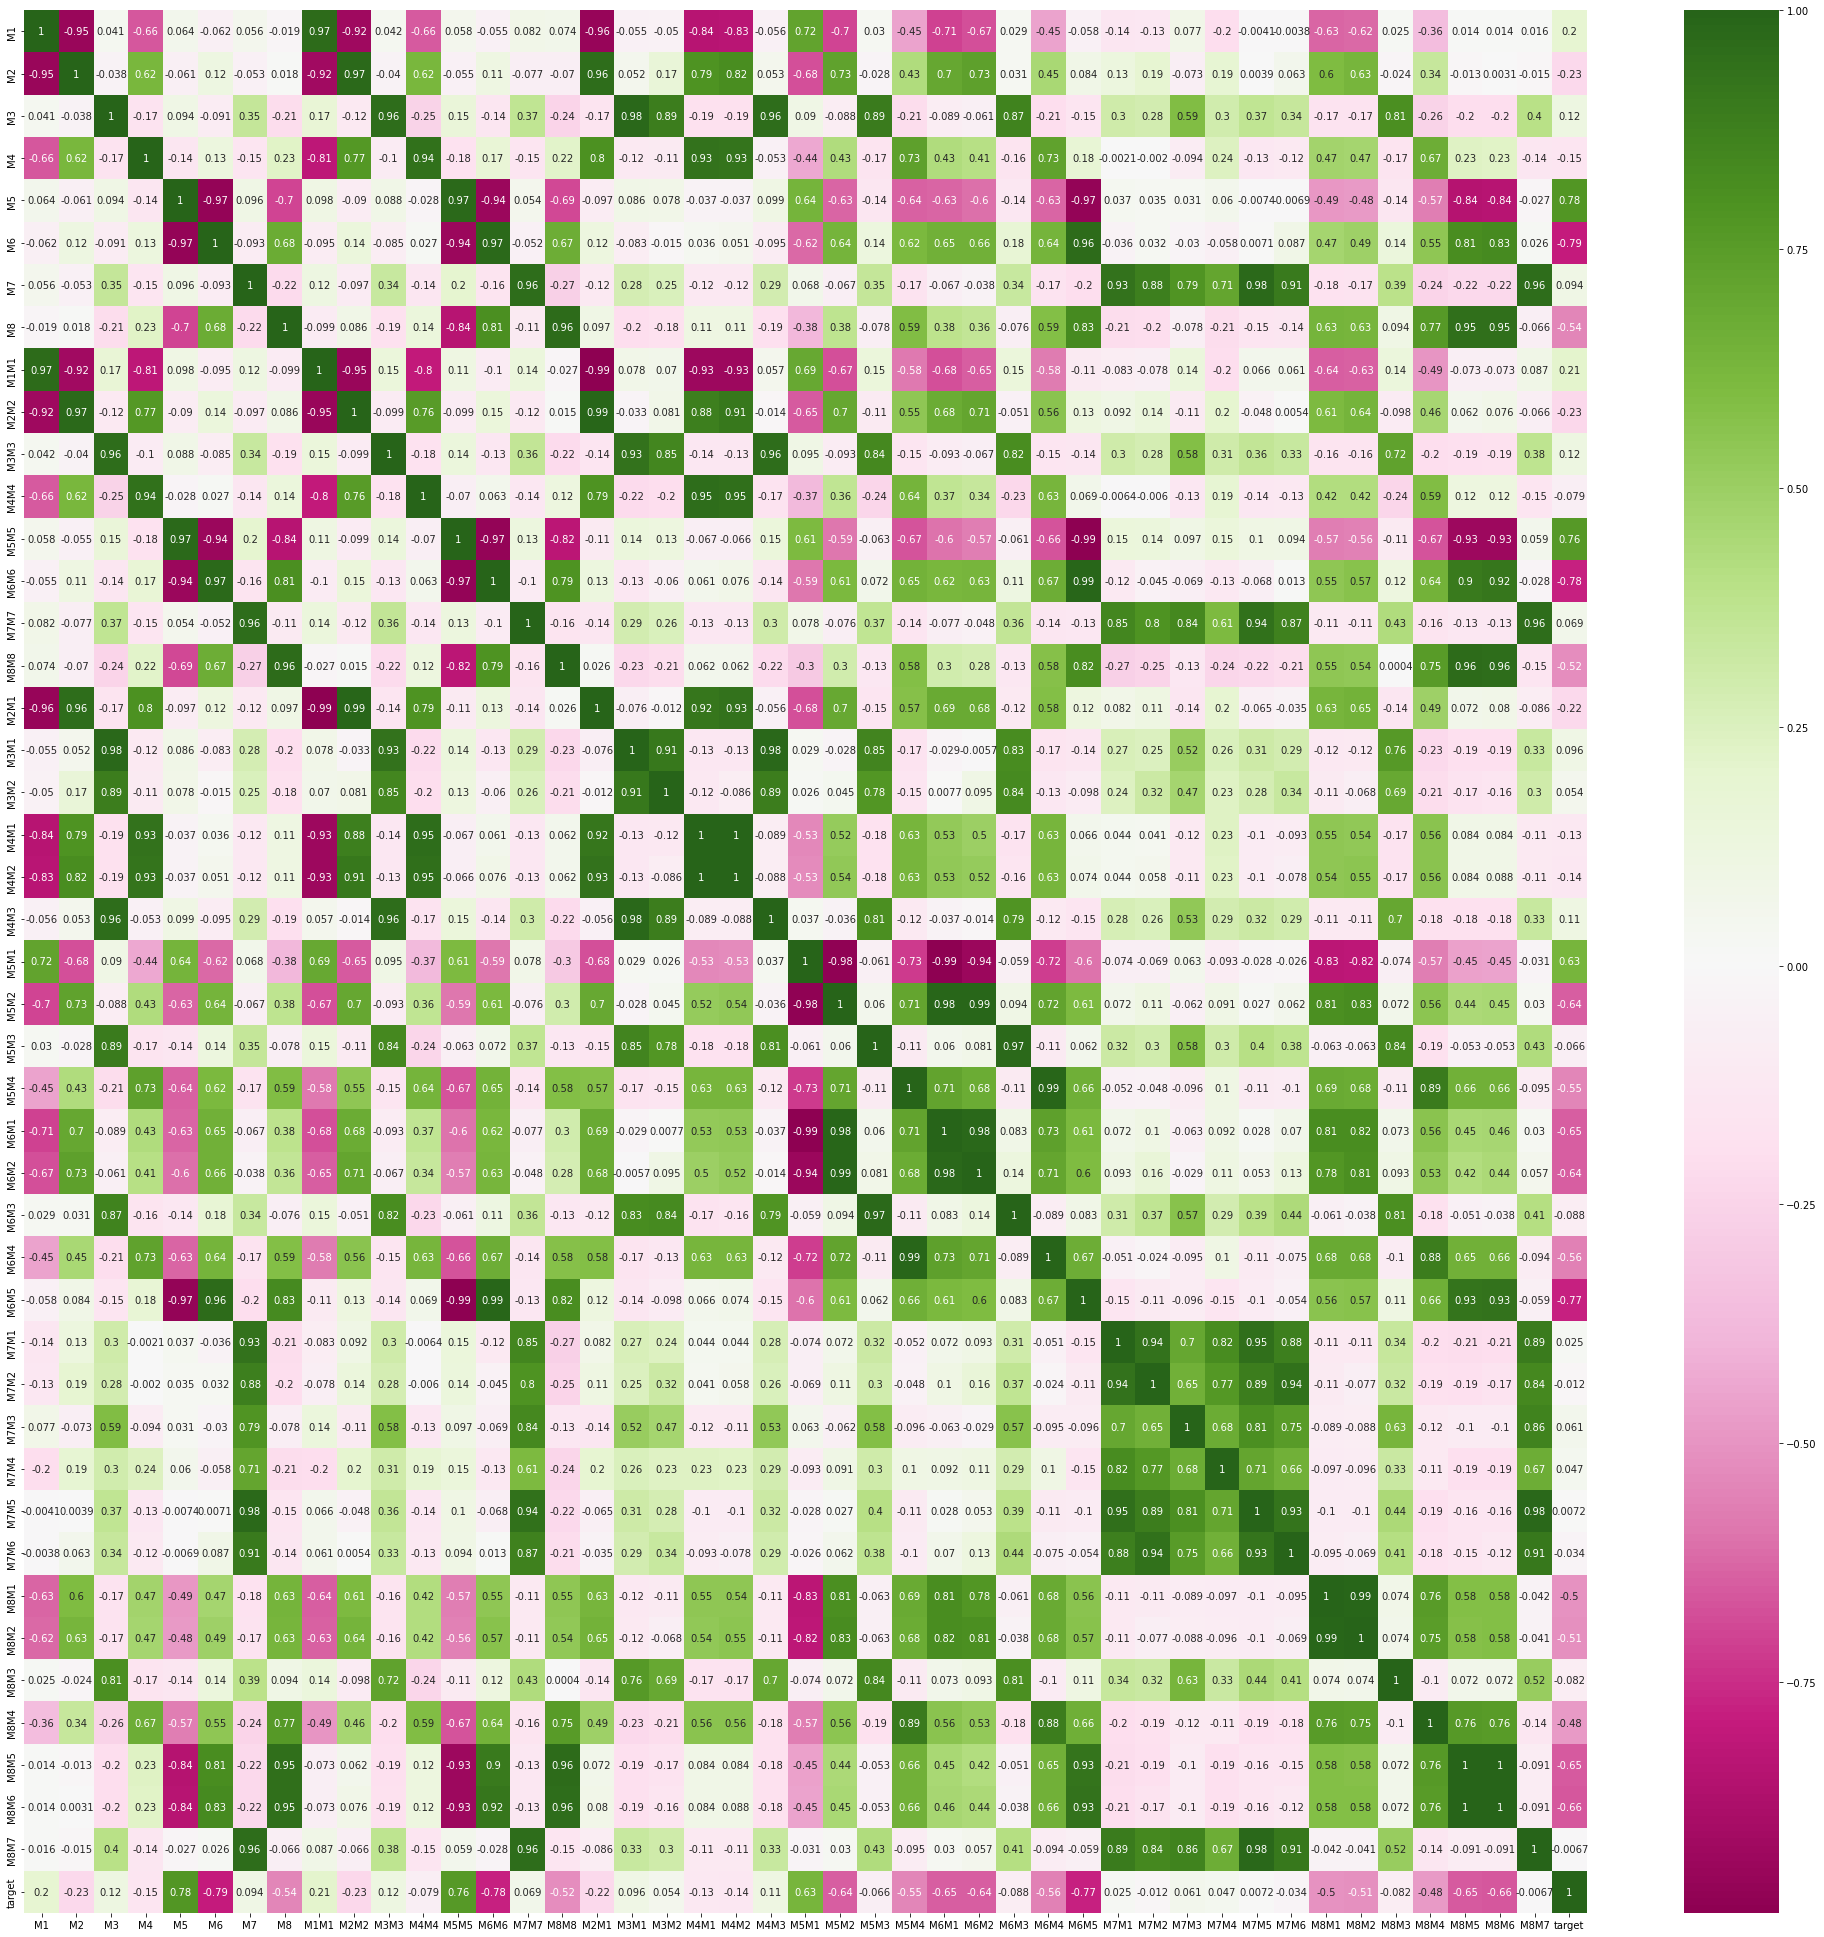

In [74]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

#correlation = data_norm[['M' + str(i) for i in range(1, 9)]]
correlation = data_norm
plt.figure(figsize=(35, 35))
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")
plt.savefig('Matrix_corr.jpg')

### 2.5 Реализация методов машинного обучения

In [75]:
# Разедляем данные на обучающую и тестовую выборки
import pandas as pd
from sklearn.model_selection import train_test_split

X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [76]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [77]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [147]:
# Избавляемся от нормализованных коэффициентов
machine_SVM = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
machine_LDA = [LDA_coef[i]/Max_M[i] for i in range(len(LDA_coef))]

In [78]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Точность классификатора:
     SVM:  0.9912974683544303
     LDA:  0.9889240506329114
Logloss:
     SVM:  0.0032963080151898368
     LDA:  0.01070817994663838


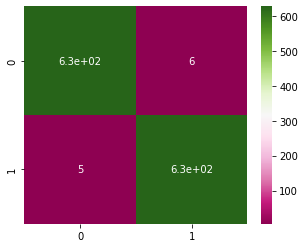

In [99]:
# Подсчет матрицы ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sea
plt.figure(figsize=(5, 4))
cnf_matrix = confusion_matrix(y_test, SVC_prediction)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
plt.savefig('Matrix_error.jpg')

### 2.6 Графики 

#### 2.6.1 Двумерные

In [80]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [81]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 8):
#     for j in range(i + 1, 7):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='x')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='.')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

#### 2.6.2 Трехмерные

In [82]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [83]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 5):
#     for j in range(0, 4):
#         for k in range(0, 3):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='x')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='.')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.grid()
#             plt.show()

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

### 2.1 Вывод частных производных

Найдем все производные вплоть до 2 порядка, дифференцируя $J$ по частным производным $s,p,q,r$ 

$ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

                        Производные 1-го порядка:
$$
h_s = \frac{-p-q+s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_p = \frac{2r + p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1
$$
$$
h_q = \frac{p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_r = \frac{2p}{\sqrt[2]{4rp+(p+q-s)^2}}
$$

                        Производные 2-го порядка:
$$
h_{ss} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pp} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{rr} = \frac{-4p^2}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$

                        Смешанные производные:
$$
h_{sp} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sq} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sr} = \frac{-2p(-p-q+s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pr} = \frac{2}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{2p(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qr} = \frac{-2p(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$


### 2.2 Реализация проверок

In [164]:
# Считаем значения искомого фитнеса
import pandas as pd
import numpy as np

def middle_SPQR():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]

      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv("data_middle_SPQR.csv", index=False)
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR
data_SPQR = middle_SPQR()

In [165]:
# Считаем значения восстановленного фитнеса
from numpy import dot
import pandas as pd

def fitness_restored():
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    data = {}
    restored_fit = pd.DataFrame(data)
    J = []
    for i in range(len(data_macro)):
        j = (dot(data_macro.loc[i], machine_SVM))
    
        p = machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i]
        q = machine_SVM[1]*M2[i]
        r = machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i]
        s = machine_SVM[5]*M6[i]

        rr = (machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])**2
        ss = (machine_SVM[5]*M6[i])**2
        pp = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])**2
        qq = (machine_SVM[1]*M2[i])**2
        
        sp = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[5]*M6[i])
        sq = (machine_SVM[5]*M6[i])*(machine_SVM[1]*M2[i])
        sr = (machine_SVM[5]*M6[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])
        pq = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[1]*M2[i])
        pr = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])
        qr = (machine_SVM[1]*M2[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])
        row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'SS': ss, 'PP': pp, 'QQ': qq, 
               'RR': rr, 'SP': sp, 'SQ': sq, 'SR': sr, 'PQ': pq, 'PR': pr, 'QR': qr}
        restored_fit = restored_fit.append(row, ignore_index=True)
    restored_fit.to_csv('data_dot.csv', index=False)
    restored_fit = restored_fit.sort_values(by='J', ascending=False)
    #restored_fit = restored_fit.reset_index(drop=True)
    return restored_fit
restored_fit = fitness_restored()

In [166]:
# Реализация косинуса между двумя векторами
from numpy import sqrt

def cosine(a, b):
    #! Числитель
    def numerator(a, b):
        summ = 0
        for i in range(len(a)):
            summ += a[i]*b[i]
        return summ
    #! Знаминатель
    def denominator(a):
        summ = 0
        for i in range(len(a)):
            summ += a[i]*a[i]
        return summ
    return numerator(a, b)/sqrt(denominator(a) * denominator(b))

In [167]:
# Подсчет частных производных искомого фитнеса
import pandas as pd
import numpy as np

def differential(i):
    s = data_SPQR['S'].tolist()[i]
    p = data_SPQR['P'].tolist()[i]      
    q = data_SPQR['Q'].tolist()[i]   
    r = data_SPQR['R'].tolist()[i]   
    
    # Частные производные первого порядка
    hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    
    """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

In [157]:
# Функция подсчета косинусов между векторами и нахождение стратегии с максимальными сходством по косинусу
def corners():
   cos = []
   coef = [0]*44
   for i in range(len(data_strat)):
      hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(i)
      coef[0] = lam[0]*hp            #M1
      coef[1] = lam[1]*hq            #M2
      coef[2] = lam[2]*hp            #M3
      coef[3] = lam[3]*hp            #M4
      coef[4] = lam[4]*hr            #M5
      coef[5] = lam[5]*hs            #M6
      coef[6] = lam[6]*hr            #M7
      coef[7] = lam[7]*hr            #M8
      coef[8] = lam[8]*hpp           #M11
      coef[9] = lam[9]*hqq           #M22
      coef[10] = lam[10]*hpp         #M33
      coef[11] = lam[11]*hpp         #M44
      coef[12] = lam[12]*hrr         #M55
      coef[13] = lam[13]*hss         #M66
      coef[14] = lam[14]*hrr         #M77
      coef[15] = lam[15]*hrr         #M88
      coef[16] = lam[16]*hpq         #M12
      coef[17] = lam[17]*hpp         #M13
      coef[18] = lam[18]*hpq         #M23
      coef[19] = lam[19]*hpp         #M14
      coef[20] = lam[20]*hpq         #M24
      coef[21] = lam[21]*hpp         #M34
      coef[22] = lam[22]*hpr         #M15
      coef[23] = lam[23]*hqr         #M25
      coef[24] = lam[24]*hpr         #M35
      coef[25] = lam[25]*hpr         #M45
      coef[26] = lam[26]*hsp         #M16
      coef[27] = lam[27]*hsq         #M26
      coef[28] = lam[28]*hsp         #M36
      coef[29] = lam[29]*hsp         #M46
      coef[30] = lam[30]*hsr         #M56
      coef[31] = lam[31]*hpr         #M17
      coef[32] = lam[32]*hqr         #M27
      coef[33] = lam[33]*hpr         #M37
      coef[34] = lam[34]*hpr         #M47
      coef[35] = lam[35]*hrr         #M57
      coef[36] = lam[36]*hsr         #M67
      coef[37] = lam[37]*hpr         #M18
      coef[38] = lam[38]*hqr         #M28
      coef[39] = lam[39]*hpr         #M38
      coef[40] = lam[40]*hpr         #M48
      coef[41] = lam[41]*hrr         #M58
      coef[42] = lam[42]*hsr         #M68
      coef[43] = lam[43]*hrr         #M78
      cos.append(cosine(coef, machine_SVM))
   best_index = cos.index(max([i for i in cos if not isinstance(i, complex)]))
   result = [i for i in cos if not isinstance(i, complex)]
   best_corn = max(np.abs(result))
   return best_index
# best_index = corners()

In [144]:
# hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(best_index)
# coef[0] = lam[0]*hp            #M1
# coef[1] = lam[1]*hq            #M2
# coef[2] = lam[2]*hp            #M3
# coef[3] = lam[3]*hp            #M4
# coef[4] = lam[4]*hr            #M5
# coef[5] = lam[5]*hs            #M6
# coef[6] = lam[6]*hr            #M7
# coef[7] = lam[7]*hr            #M8
# coef[8] = lam[8]*hpp           #M11
# coef[9] = lam[9]*hqq           #M22
# coef[10] = lam[10]*hpp         #M33
# coef[11] = lam[11]*hpp         #M44
# coef[12] = lam[12]*hrr         #M55
# coef[13] = lam[13]*hss         #M66
# coef[14] = lam[14]*hrr         #M77
# coef[15] = lam[15]*hrr         #M88
# coef[16] = lam[16]*hpq         #M12
# coef[17] = lam[17]*hpp         #M13
# coef[18] = lam[18]*hpq         #M23
# coef[19] = lam[19]*hpp         #M14
# coef[20] = lam[20]*hpq         #M24
# coef[21] = lam[21]*hpp         #M34
# coef[22] = lam[22]*hpr         #M15
# coef[23] = lam[23]*hqr         #M25
# coef[24] = lam[24]*hpr         #M35
# coef[25] = lam[25]*hpr         #M45
# coef[26] = lam[26]*hsp         #M16
# coef[27] = lam[27]*hsq         #M26
# coef[28] = lam[28]*hsp         #M36
# coef[29] = lam[29]*hsp         #M46
# coef[30] = lam[30]*hsr         #M56
# coef[31] = lam[31]*hpr         #M17
# coef[32] = lam[32]*hqr         #M27
# coef[33] = lam[33]*hpr         #M37
# coef[34] = lam[34]*hpr         #M47
# coef[35] = lam[35]*hrr         #M57
# coef[36] = lam[36]*hsr         #M67
# coef[37] = lam[37]*hpr         #M18
# coef[38] = lam[38]*hqr         #M28
# coef[39] = lam[39]*hpr         #M38
# coef[40] = lam[40]*hpr         #M48
# coef[41] = lam[41]*hrr         #M58
# coef[42] = lam[42]*hsr         #M68
# coef[43] = lam[43]*hrr         #M78
# coef_1 = np.array(coef)*10
# print(cosine(coef_1, machine))
# q = {'Тейлор': coef_1, 'SVM': machine}
# df = pd.DataFrame(q)
# df

In [145]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* (coef[i]*Max_M[i]) / (coef[j]*Max_M[j]) * x, label='true')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [148]:
def gdrf(i):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()

    hs_ = (machine[5]*M6[i])/(lam[5]*M6[i])
    hp_ = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])
    hq_ = (machine[1]*M2[i])/(lam[1]*M2[i])
    hr_ = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])
    hss_ = (machine[5]*M6[i])**2/(lam[5]*M6[i])**2
    hpp_ = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])**2/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])**2
    hqq_ = (machine[1]*M2[i])**2/(lam[1]*M2[i])**2
    hrr_ = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])**2/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])**2
    hsp_ = (machine[5]*M6[i]*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))/(lam[5]*M6[i]*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hsq_ = (machine[5]*M6[i]*machine[1]*M2[i])/(lam[5]*M6[i]*lam[1]*M2[i])
    hsr_ = ((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hpq_ = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))
    hpr_ = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hqr_ = (machine[1]*M2[i]*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/(lam[1]*M2[i]*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))

    # hs_ = (lam[5]*M6[i])/(machine[5]*M6[i])
    # hp_ = (lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])/(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])
    # hq_ = (lam[1]*M2[i])/(machine[1]*M2[i])
    # hr_ = (lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])/(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])
    # hss_ = (lam[5]*M6[i])**2/(machine[5]*M6[i])**2
    # hpp_ = (lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])**2/(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])**2
    # hqq_ = (lam[1]*M2[i])**2/(machine[1]*M2[i])**2
    # hrr_ = (lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])**2/(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])**2
    # hsp_ = (lam[5]*M6[i]*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))/(machine[5]*M6[i]*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))
    # hsq_ = (lam[5]*M6[i]*lam[1]*M2[i])/(machine[5]*M6[i]*machine[1]*M2[i])
    # hsr_ = ((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    # hpq_ = ((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))/((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))
    # hpr_ = ((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    # hqr_ = (lam[1]*M2[i]*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/(machine[1]*M2[i]*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    print(hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_)
    return hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_


#hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(ju)
#hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_ = gdrf(ju)
#h1 = [hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr]
#h2 = [hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_]
#print('------------------------------------')
#print(hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr)
#print('------------------------------------')
#print('Косинус = ', cosine(h1, h2))
#df=pd.DataFrame([['hp',  hp /hp,  hp_ /hp_],
#                 ['hq',  hq /hp,  hq_ /hp_],
#                 ['hr',  hr /hp,  hr_ /hp_],
#                 ['hs',  hs /hp,  hs_ /hp_],
#                 ['hpp', hpp/hp,  hpp_/hp_],
#                 ['hqq', hqq/hp,  hqq_/hp_],
#                 ['hrr', hrr/hp,  hrr_/hp_],
#                 ['hss', hss/hp,  hss_/hp_],
#                 ['hsp', hsp/hp,  hsp_/hp_],
#                 ['hsq', hsq/hp,  hsq_/hp_],
#                 ['hsr', hsr/hp,  hsr_/hp_],
#                 ['hpq', hpq/hp,  hpq_/hp_],
#                 ['hpr', hpr/hp,  hpr_/hp_],
#                 ['hqr', hqr/hp,  hqr_/hp_],
#                 ], 
#    columns=['id','Тейлор', 'SVC'])
#df

In [149]:
def gdrfsadas(i):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    p = machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]
    q = machine[1]*M2[i]
    r = machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]
    s = machine[5]*M6[i]

    hs_ = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp_ = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq_ = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr_ = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss_ = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp_ = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq_ = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr_ = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp_ = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq_ = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr_ = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq_ = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr_ = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr_ = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

    #hs_ = (lam[5]*M6[i])/(machine[5]*M6[i])
    #hp_ = (lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])/(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])
    #hq_ = (lam[1]*M2[i])/(machine[1]*M2[i])
    #hr_ = (lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])/(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])
    #hss_ = (lam[5]*M6[i])**2/(machine[5]*M6[i])**2
    #hpp_ = (lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])**2/(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])**2
    #hqq_ = (lam[1]*M2[i])**2/(machine[1]*M2[i])**2
    #hrr_ = (lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])**2/(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])**2
    #hsp_ = (lam[5]*M6[i]*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))/(machine[5]*M6[i]*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))
    #hsq_ = (lam[5]*M6[i]*lam[1]*M2[i])/(machine[5]*M6[i]*machine[1]*M2[i])
    #hsr_ = ((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    #hpq_ = ((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))/((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))
    #hpr_ = ((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    #hqr_ = (lam[1]*M2[i]*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/(machine[1]*M2[i]*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    print(hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_)
    return hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_


# hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(ju)
# hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_ = gdrfsadas(ju)
# h1 = [hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr]
# h2 = [hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_]
# print('------------------------------------')
# print(hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr)
# print('Косинус = ', cosine(h1, h2))
# df=pd.DataFrame([['hp',  hp /hp,  hp_ /hp_],
#                  ['hq',  hq /hp,  hq_ /hp_],
#                  ['hr',  hr /hp,  hr_ /hp_],
#                  ['hs',  hs /hp,  hs_ /hp_],
#                  ['hpp', hpp/hp,  hpp_/hp_],
#                  ['hqq', hqq/hp,  hqq_/hp_],
#                  ['hrr', hrr/hp,  hrr_/hp_],
#                  ['hss', hss/hp,  hss_/hp_],
#                  ['hsp', hsp/hp,  hsp_/hp_],
#                  ['hsq', hsq/hp,  hsq_/hp_],
#                  ['hsr', hsr/hp,  hsr_/hp_],
#                  ['hpq', hpq/hp,  hpq_/hp_],
#                  ['hpr', hpr/hp,  hpr_/hp_],
#                  ['hqr', hqr/hp,  hqr_/hp_],
#                  ], 
#     columns=['id','Тейлор', 'SVC'])
# df

In [160]:
restored_fit[:20]

,J,S,P,Q,R,SS,PP,QQ,RR,SP,SQ,SR,PQ,PR,QR
49,27.795995,5.821004,-0.751178,0.569363,1.196513,33.884086,0.564268,0.324174,1.431643,-4.372609,3.314261,6.964907,-0.427693,-0.898794,0.681250
48,26.834672,5.806121,-0.751178,0.487420,1.196513,33.711046,0.564268,0.237578,1.431643,-4.361430,2.830017,6.947100,-0.366139,-0.898794,0.583204
35,25.547068,5.541959,-0.864013,0.577436,1.373271,30.713307,0.746518,0.333432,1.885874,-4.788322,3.200125,7.610613,-0.498912,-1.186524,0.792976
69,25.422022,5.496071,-2.370143,0.681638,1.351277,30.206801,5.617578,0.464630,1.825949,-13.026475,3.746329,7.426714,-1.615579,-3.202719,0.921081
68,24.521558,5.321451,-2.370143,0.676851,1.351277,28.317843,5.617578,0.458128,1.825949,-12.612600,3.601832,7.190753,-1.604235,-3.202719,0.914614
57,23.825804,5.221243,-0.885499,0.589055,1.426239,27.261379,0.784109,0.346986,2.034157,-4.623407,3.075601,7.446739,-0.521608,-1.262933,0.840133
25,23.821121,5.318723,-1.293184,0.622847,1.436051,28.288812,1.672326,0.387939,2.062241,-6.878089,3.312753,7.637955,-0.805457,-1.857078,0.894440
23,23.294002,5.154272,-1.485634,0.637696,1.464857,26.566522,2.207110,0.406657,2.145805,-7.657364,3.286861,7.550270,-0.947384,-2.176242,0.934134
17,23.146501,5.430093,-0.214199,0.466141,1.412807,29.485907,0.045881,0.217287,1.996022,-1.163118,2.531188,7.671671,-0.099847,-0.302621,0.658567
34,22.545689,5.033477,-0.864013,0.511639,1.373271,25.335888,0.746518,0.261775,1.885874,-4.348987,2.575324,6.912329,-0.442063,-1.186524,0.702619


In [156]:
data_SPQR[:20]

,J,S,P,Q,R
49,1.090545,-0.46936,0.114474,-0.007899,0.432267
48,1.088158,-0.46816,0.114474,-0.006762,0.432267
35,1.056420,-0.44686,0.116663,-0.008011,0.444087
69,1.048624,-0.44316,0.114921,-0.009456,0.444717
68,1.023720,-0.42908,0.114921,-0.009390,0.444717
25,1.023352,-0.42886,0.116684,-0.008641,0.439843
57,1.008695,-0.42100,0.113150,-0.008172,0.448835
23,1.003099,-0.41560,0.116974,-0.008847,0.447974
17,0.998528,-0.43784,0.079213,-0.006467,0.443554
56,0.991501,-0.41140,0.113150,-0.006822,0.448835


In [155]:
# j1 = fit_data.loc[0]
# j2 = fit_data.loc[1]
# j3 = fit_data.loc[2]
# j4 = fit_data.loc[3]
# j5 = fit_data.loc[4]

In [154]:
# from scipy.optimize import linprog
# obj = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# 
# lhs_eq  = [[j1[1], j1[2], j1[3], j1[4], j1[5], j1[6], j1[7], j1[8], j1[9], j1[10], j1[11], j1[12], j1[13], j1[14]],
#            [j2[1], j2[2], j2[3], j2[4], j2[5], j2[6], j2[7], j2[8], j2[9], j2[10], j2[11], j2[12], j2[13], j2[14]],
#            [j3[1], j3[2], j3[3], j3[4], j3[5], j3[6], j3[7], j3[8], j3[9], j3[10], j3[11], j3[12], j3[13], j3[14]],
#            [j4[1], j4[2], j4[3], j4[4], j4[5], j4[6], j4[7], j4[8], j4[9], j4[10], j4[11], j4[12], j4[13], j4[14]],
#            [j5[1], j5[2], j5[3], j5[4], j5[5], j5[6], j5[7], j5[8], j5[9], j5[10], j5[11], j5[12], j5[13], j5[14]]]
# 
# rhs_eq  = [j1[0],
#            j2[0],
#            j3[0],
#            j4[0],
#            j5[0]]
# 
# opt = linprog(c=obj, A_eq=lhs_eq, b_eq=rhs_eq,
#               method="revised simplex")
# 
# opt